import rasterio
import matplotlib.pyplot as plt
import contextily as ctx
from rasterio.windows import Window
from rasterio.plot import show
from rasterio.warp import calculate_default_transform, reproject, Resampling
import numpy as np
"""
# Path to your NLCD .img file
raster_path = r'C:\EsriPress\GTKAGPro\MyProject\nlcd_2001_land_cover_l48_20210604.img'

# Define a smaller window size
window_size = 1000  # Adjust this size as needed

# Read and process smaller chunks of the raster
with rasterio.open(raster_path) as src:
    # Define a window to read a portion of the raster data
    window = Window(0, 0, window_size, window_size)  # Example: top-left corner

    # Read the chunk of raster data (first band)
    raster_chunk = src.read(1, window=window)
    
    # Get the transform for the chunk (the geographical location)
    window_transform = src.window_transform(window)

    # Reproject the raster to Web Mercator (EPSG:3857) to match the OpenStreetMap basemap
    dst_crs = 'EPSG:3857'  # Web Mercator CRS
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)

    # Create an empty array for the reprojected raster data
    dst_raster_chunk = np.empty((height, width), dtype=raster_chunk.dtype)

    # Reproject the data to match OpenStreetMap CRS
    reproject(
        source=raster_chunk,
        destination=dst_raster_chunk,
        src_transform=window_transform,
        src_crs=src.crs,
        dst_transform=transform,
        dst_crs=dst_crs,
        resampling=Resampling.nearest)

# Save the reprojected raster chunk to disk
reprojected_raster_path = r'C:\EsriPress\GTKAGPro\MyProject\reprojected_raster_chunk.tif'
with rasterio.open(
        reprojected_raster_path, 'w', driver='GTiff',
        height=height, width=width,
        count=1, dtype=raster_chunk.dtype,
        crs=dst_crs, transform=transform) as dst:
    dst.write(dst_raster_chunk, 1)

# Plot the reprojected raster chunk over OpenStreetMap basemap
fig, ax = plt.subplots(figsize=(10, 10))
show(dst_raster_chunk, ax=ax, cmap='terrain', extent=(transform[2], transform[2] + width * transform[0],
                                                      transform[5] + height * transform[4], transform[5]))
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title('NLCD Land Cover Chunk with OpenStreetMap Basemap')
plt.show()
"""

In [1]:
import pandas as pd

bloom_df = pd.read_csv('Cyanobacteria2024.csv')

In [2]:
bloom_df.head()

,Identifier,LAKE,TOWN,Noted.Location,Dominant.Taxa,Total.Cell.Concentration,Date.Advisory.Issued,Date.Advisory.Removed,Advisory.Days,AUID,Notification.Type
0,Webster.Franklin,Webster Lake,Franklin,NaN,unidentified,">70,000 or >50%",9/11/2003,9/26/2003,15.0,NHLAK700010804-02-01,Warning
1,Baboosic.Amherst,Baboosic Lake,Amherst,NaN,Anabaena,">70,000 or >50%",7/8/2004,9/6/2004,60.0,NHLAK700060905-01-01,Warning
2,Greenwood.Kingston,Greenwood Pond,Kingston,NaN,Oscillatoria,">70,000 or >50%",7/8/2004,7/23/2004,15.0,NHLAK700061403-07,Warning
3,Country.Kingston,Country Pond,"Kingston, Newton",NaN,Microcystis,">70,000 or >50%",7/29/2004,8/6/2004,8.0,NHLAK700061403-03-01,Warning
4,Robinson.Hudson,Robinson Pond,Hudson,NaN,unidentified,">70,000 or >50%",8/18/2004,9/3/2004,16.0,NHLAK700061203-06-01,Warning


In [3]:
print(bloom_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Identifier                696 non-null    object 
 1   LAKE                      696 non-null    object 
 2   TOWN                      696 non-null    object 
 3   Noted.Location            0 non-null      float64
 4   Dominant.Taxa             538 non-null    object 
 5   Total.Cell.Concentration  447 non-null    object 
 6   Date.Advisory.Issued      696 non-null    object 
 7   Date.Advisory.Removed     515 non-null    object 
 8   Advisory.Days             515 non-null    float64
 9   AUID                      696 non-null    object 
 10  Notification.Type         696 non-null    object 
dtypes: float64(2), object(9)
memory usage: 59.9+ KB
None


In [4]:
bloom_df.describe()

,Noted.Location,Advisory.Days
count,0.0,515.000000
mean,NaN,20.702913
std,NaN,25.139902
min,NaN,1.000000
25%,NaN,7.000000
50%,NaN,10.000000
75%,NaN,22.000000
max,NaN,132.000000


In [101]:
top_5_taxa = bloom_df['dominant_taxa'].value_counts().head(5).reset_index()
df_top_5_taxa = bloom_df[bloom_df['dominant_taxa'].isin(top_5_taxa['dominant_taxa'])]

print(df_top_5_taxa['dominant_taxa'].unique())

['Anabaena' 'Microcystis' 'Anabaena/Dolichospermum' 'Dolichospermum'
 'Photo']


In [5]:
print(bloom_df.isnull().sum())

Identifier                    0
LAKE                          0
TOWN                          0
Noted.Location              696
Dominant.Taxa               158
Total.Cell.Concentration    249
Date.Advisory.Issued          0
Date.Advisory.Removed       181
Advisory.Days               181
AUID                          0
Notification.Type             0
dtype: int64


In [6]:
len(bloom_df)

696

<Axes: >

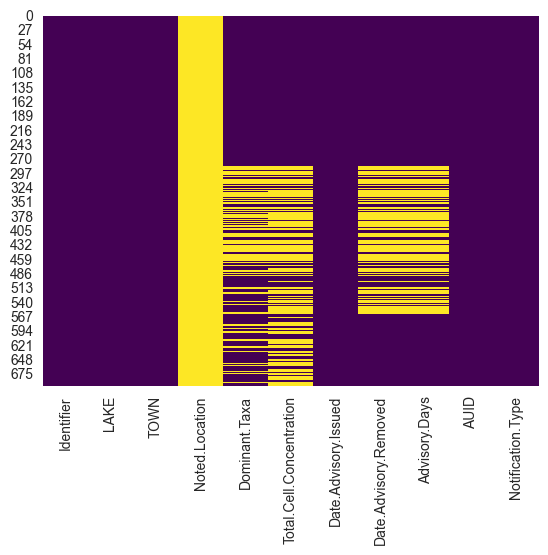

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(bloom_df.isnull(), cbar=False, cmap='viridis')

In [8]:
bloom_df = bloom_df.drop(columns='Noted.Location')

In [9]:
bloom_df.columns = bloom_df.columns.str.strip().str.lower().str.replace('.', '_')

In [10]:
print(bloom_df['notification_type'].value_counts())
print("\n\n")
print(bloom_df['dominant_taxa'].value_counts())
print("\n\n")
print(bloom_df['town'].value_counts())
print("\n\n")
print(bloom_df['lake'].value_counts())

notification_type
Warning    448
Alert      248
Name: count, dtype: int64



dominant_taxa
Anabaena                                      101
Photo                                          55
Anabaena/Dolichospermum                        49
Dolichospermum                                 48
Microcystis                                    38
                                             ... 
Woronichinia, Microcystis, Planktothrix         1
Dolichospermum, Chrysosporum, Microcystis       1
Phormidium                                      1
Dolichospermum, Woronichinia, Planktothrix      1
Photo (Blackey Cove)                            1
Name: count, Length: 96, dtype: int64



town
Hollis           34
Sandown          29
Pelham           29
Henniker         27
Barrington       22
                 ..
South Hampton     1
Hampstead         1
Swanzey           1
Danbury           1
Madison           1
Name: count, Length: 117, dtype: int64



lake
Silver Lake              35
Long Pond         

In [11]:
print(bloom_df.groupby('notification_type').size())

notification_type
Alert      248
Warning    448
dtype: int64


In [12]:
bloom_df.groupby(['notification_type', 'dominant_taxa']).size().unstack()

dominant_taxa,"Microcystis, Woronichinia",(Green's Basin),Anabaena,Anabaena/Dolichospermum,"Anabaena/Dolichospermum, Microcystis","Anabaena/Dolichospermum, Microcystis, Aphanizomenon","Anabaena/Dolichospermum, Microcystis, Woronichinia","Anabaena/Dolichospermum, Woronichinia, Oscillatoria",Aphanizomenon,"Aphanizomenon, Chrysosporum, Woronichinia, Phormidium, Dolichospermum",...,"Planktothrix, Woronichinia","Scytonema, Stigonema, Tolypothrix, Lyngbya",Spirulina,Unidentified,Woronichinia,"Woronichinia, Dolichospermum, Microcystis","Woronichinia, Microcystis","Woronichinia, Microcystis, Dolichospermum","Woronichinia, Microcystis, Planktothrix",unidentified
notification_type,,,,,,,,,,,,,,,,,,,,,
Alert,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Warning,1.0,NaN,101.0,49.0,2.0,1.0,1.0,1.0,5.0,1.0,...,1.0,1.0,1.0,9.0,4.0,2.0,2.0,3.0,1.0,16.0


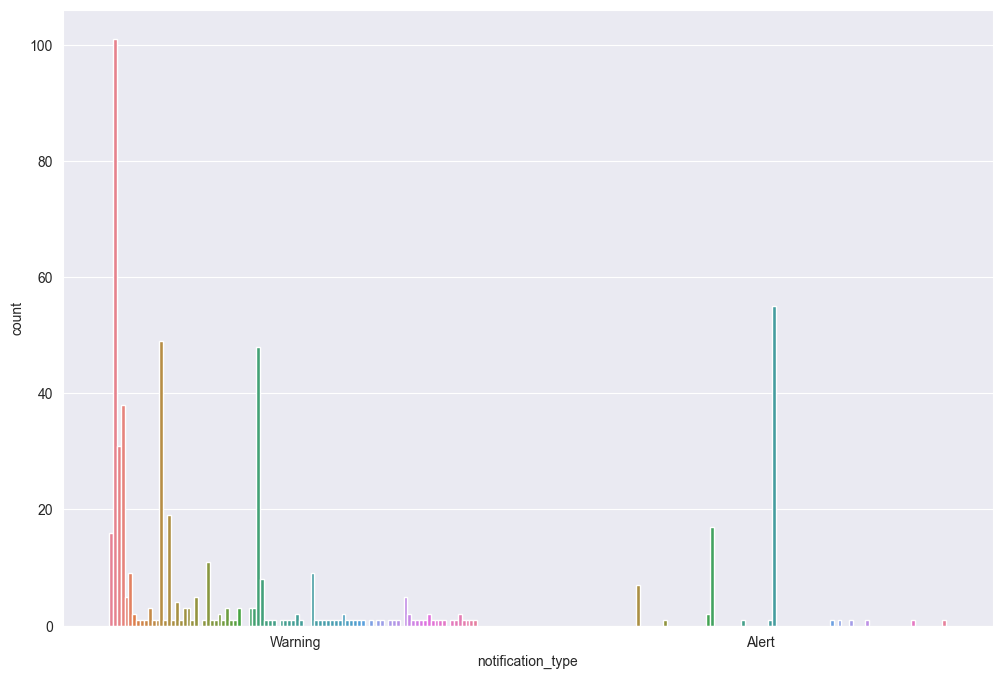

In [83]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(ax=ax, data=bloom_df, x='notification_type', hue='dominant_taxa', legend=False, linewidth=1)
plt.show()

In [ ]:
print(bloom_df)

In [14]:
print(bloom_df['lake'].value_counts())
print(bloom_df['town'].value_counts())

lake
Silver Lake              35
Long Pond                26
Winnipesaukee, Lake      20
Province Lake            18
Country Pond             17
                         ..
Tuxbury Pond              1
Wash Pond/Sunset Lake     1
Chalk Pond                1
Swanzey Lake              1
White Lake                1
Name: count, Length: 153, dtype: int64
town
Hollis           34
Sandown          29
Pelham           29
Henniker         27
Barrington       22
                 ..
South Hampton     1
Hampstead         1
Swanzey           1
Danbury           1
Madison           1
Name: count, Length: 117, dtype: int64


In [15]:
pivot = bloom_df.pivot_table(index='lake', columns='notification_type', aggfunc='size', fill_value=0)
print(pivot)

notification_type         Alert  Warning
lake                                    
Adder Pond/Hopkins Pond       0        2
Angle Pond                    1        3
Arlington Mill Reservoir      2        5
Ayers Pond                    2        3
Baboosic Lake                 2       10
...                         ...      ...
Winnepocket, Lake             1        0
Winnipesaukee, Lake          13        7
Winnisquam, Lake              3        2
Winona, Lake                  1        3
York Pond                     0        3

[153 rows x 2 columns]


In [93]:
towns_with_most = bloom_df['town'].value_counts().head(10).reset_index()
bloom_df_top_10 = bloom_df[bloom_df['town'].isin(towns_with_most['town'])]

<Axes: xlabel='count', ylabel='town'>

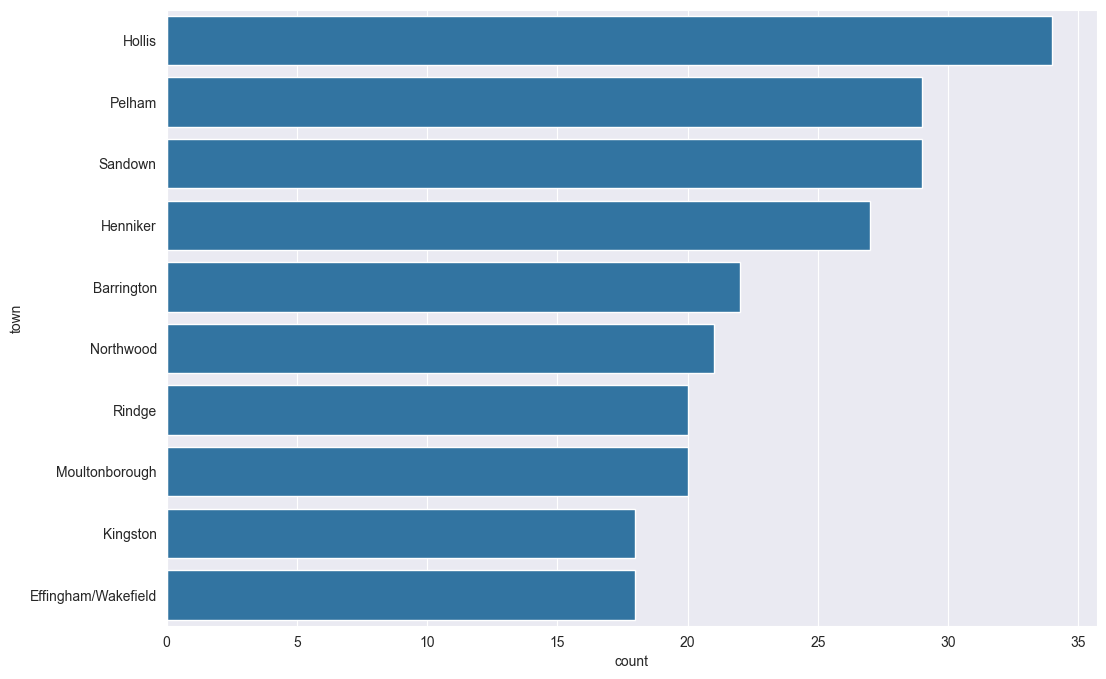

In [94]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.countplot(ax=ax, data=bloom_df_top_10, y='town', order=bloom_df_top_10['town'].value_counts().index)

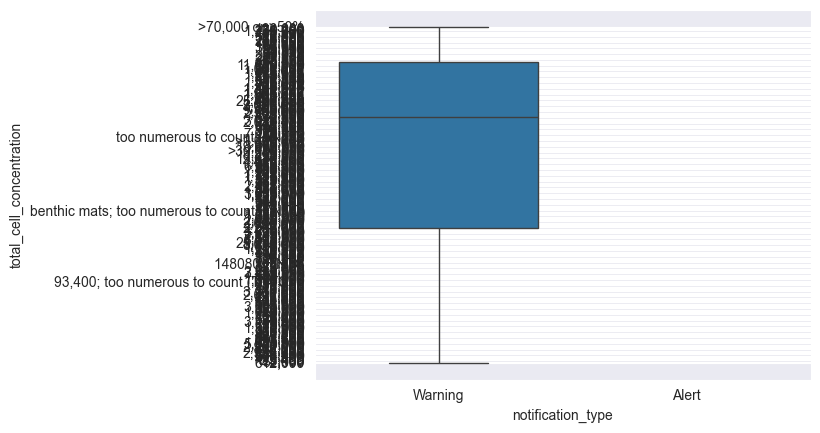

In [17]:
sns.boxplot(data=bloom_df, x='notification_type', y='total_cell_concentration')
plt.show()

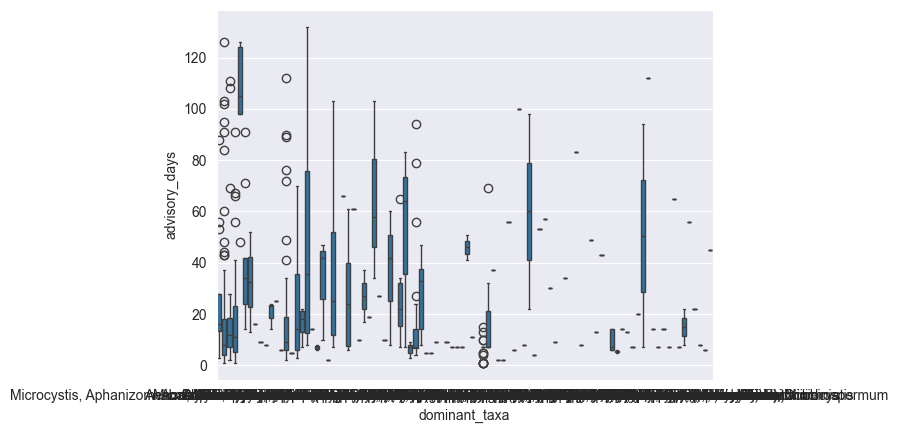

In [18]:
sns.boxplot(data=bloom_df, x='dominant_taxa', y='advisory_days')
plt.show()

In [19]:
bloom_df['date_advisory_issued'] = pd.to_datetime(bloom_df['date_advisory_issued'])
bloom_df['date_advisory_removed'] = pd.to_datetime(bloom_df['date_advisory_removed'])

year
2003      1
2004      4
2005      6
2006     12
2007     11
2008     20
2009     25
2010     23
2011     14
2012     11
2013     10
2014     19
2015     15
2016     21
2017     18
2018     34
2019     34
2020     60
2021    121
2022    101
2023    136
dtype: int64


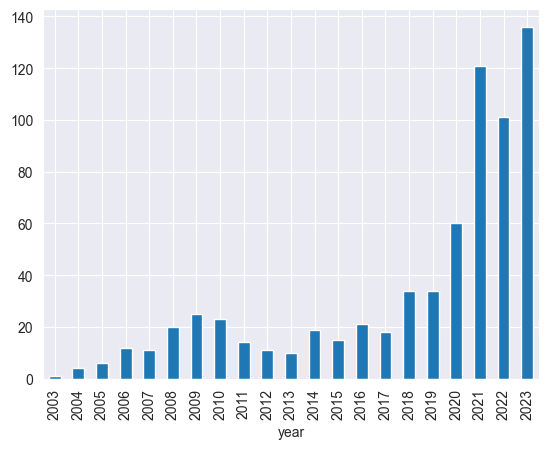

In [20]:
bloom_df['year'] = bloom_df['date_advisory_issued'].dt.year
advisory_counts_by_year = bloom_df.groupby('year').size()
print(advisory_counts_by_year)
advisory_counts_by_year.plot(kind='bar')
plt.show()

In [103]:
auid_advisory_counts = bloom_df['lake'].value_counts()
print(auid_advisory_counts)

lake
Silver Lake              35
Long Pond                26
Winnipesaukee, Lake      20
Province Lake            18
Country Pond             17
                         ..
Tuxbury Pond              1
Wash Pond/Sunset Lake     1
Chalk Pond                1
Swanzey Lake              1
White Lake                1
Name: count, Length: 153, dtype: int64


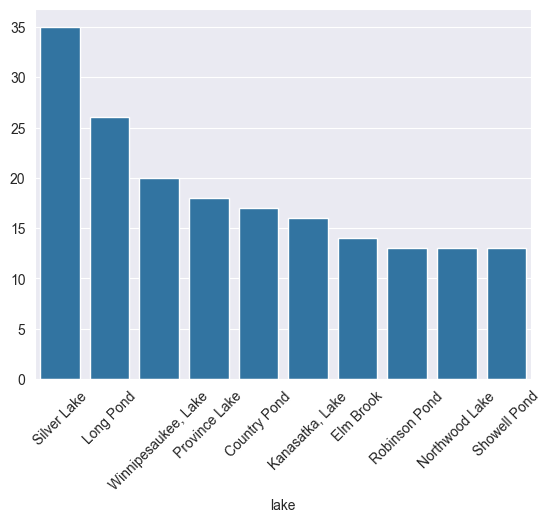

In [105]:
sns.barplot(x=auid_advisory_counts.head(10).index, y=auid_advisory_counts.head(10).values)
plt.xticks(rotation=45)
plt.show()

In [23]:
top_lakes = bloom_df['lake'].value_counts().head(10).index
top_lakes_df = bloom_df[bloom_df['lake'].isin(top_lakes)]
print(top_lakes)

Index(['Silver Lake', 'Long Pond', 'Winnipesaukee, Lake', 'Province Lake',
       'Country Pond', 'Kanasatka, Lake', 'Elm Brook', 'Robinson Pond',
       'Northwood Lake', 'Showell Pond'],
      dtype='object', name='lake')


In [24]:
time_series_data = bloom_df[bloom_df['lake'].isin(top_lakes)]

In [25]:
time_series_data['YearMonth'] = time_series_data['date_advisory_issued'].dt.to_period('M')
aggregated = time_series_data.groupby(['lake', 'YearMonth']).size().reset_index(name='notification_count')
print(aggregated)

                    lake YearMonth  notification_count
0           Country Pond   2004-07                   1
1           Country Pond   2005-08                   1
2           Country Pond   2006-08                   1
3           Country Pond   2007-07                   1
4           Country Pond   2008-08                   1
..                   ...       ...                 ...
147  Winnipesaukee, Lake   2022-10                   1
148  Winnipesaukee, Lake   2023-06                   1
149  Winnipesaukee, Lake   2023-07                   1
150  Winnipesaukee, Lake   2023-08                   3
151  Winnipesaukee, Lake   2023-10                   1

[152 rows x 3 columns]


C:\Users\curti\AppData\Local\Temp\ipykernel_58748\3431587066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['YearMonth'] = time_series_data['date_advisory_issued'].dt.to_period('M')


In [26]:
time_series_pivot = aggregated.pivot(index='YearMonth', columns='lake', values='notification_count').fillna(0)
time_series_pivot

lake,Country Pond,Elm Brook,"Kanasatka, Lake",Long Pond,Northwood Lake,Province Lake,Robinson Pond,Showell Pond,Silver Lake,"Winnipesaukee, Lake"
YearMonth,,,,,,,,,,
2004-07,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-08,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2005-07,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-08,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2023-07,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0
2023-08,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,3.0
2023-09,1.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0


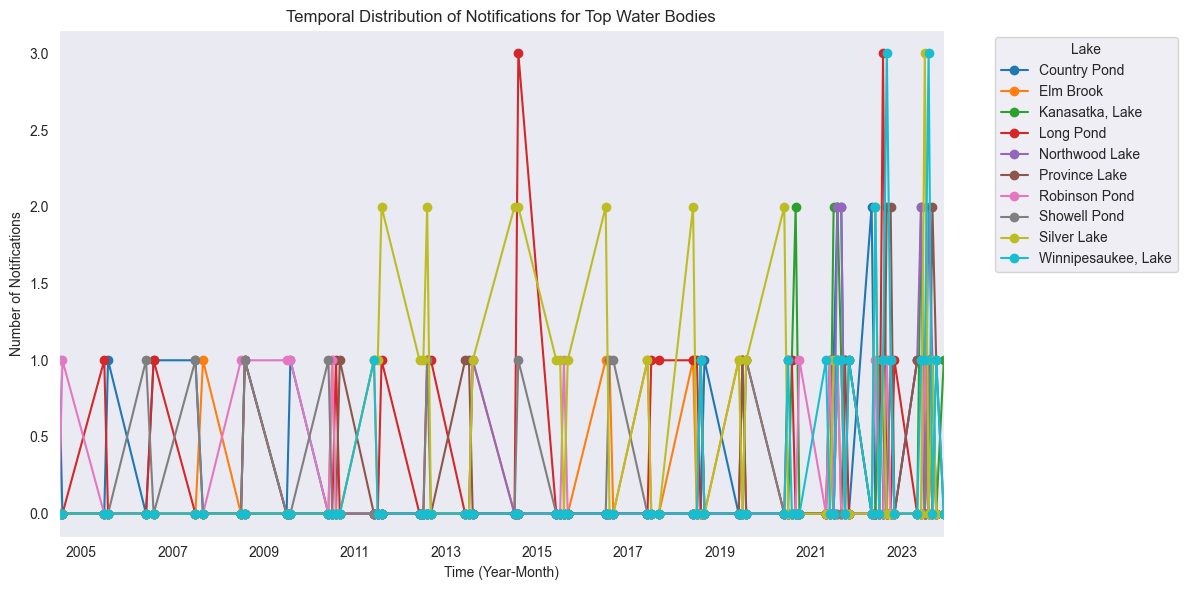

In [27]:
time_series_pivot.plot(figsize=(12, 6), marker='o')
plt.title('Temporal Distribution of Notifications for Top Water Bodies')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Number of Notifications')
plt.legend(title='Lake', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [28]:
time_series_data['month'] = time_series_data['date_advisory_issued'].dt.month
monthly_counts = time_series_data.groupby(['lake', 'month']).size().reset_index(name='monthly_count')
print(monthly_counts)

                   lake  month  monthly_count
0          Country Pond      5              3
1          Country Pond      6              1
2          Country Pond      7              3
3          Country Pond      8              6
4          Country Pond      9              4
5             Elm Brook      6              5
6             Elm Brook      7              3
7             Elm Brook      8              5
8             Elm Brook      9              1
9       Kanasatka, Lake      6              2
10      Kanasatka, Lake      7              3
11      Kanasatka, Lake      8              5
12      Kanasatka, Lake      9              4
13      Kanasatka, Lake     11              1
14      Kanasatka, Lake     12              1
15            Long Pond      6              1
16            Long Pond      7              5
17            Long Pond      8             15
18            Long Pond      9              3
19            Long Pond     10              1
20            Long Pond     11    

C:\Users\curti\AppData\Local\Temp\ipykernel_58748\2085439966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['month'] = time_series_data['date_advisory_issued'].dt.month


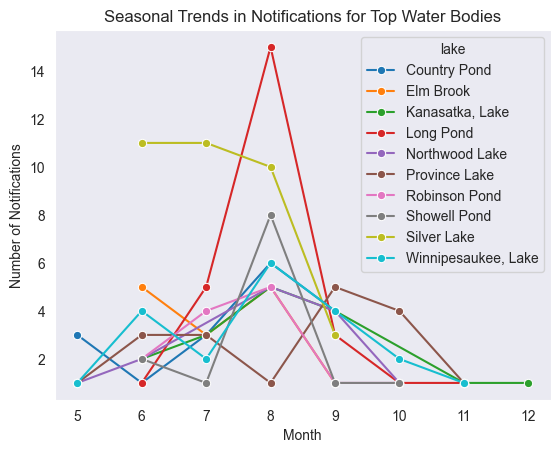

In [29]:
sns.lineplot(data=monthly_counts, x='month', y='monthly_count', hue='lake', marker='o')
plt.title('Seasonal Trends in Notifications for Top Water Bodies')
plt.xlabel('Month')
plt.ylabel('Number of Notifications')
plt.grid()
plt.show()

In [30]:
# time_series_pivot.index = time_series_pivot.index.to_timestamp()
print(time_series_pivot.index)
print(time_series_pivot.index.is_monotonic_increasing)

PeriodIndex(['2004-07', '2004-08', '2005-07', '2005-08', '2006-06', '2006-08',
             '2007-07', '2007-09', '2008-07', '2008-08', '2009-07', '2009-08',
             '2010-06', '2010-07', '2010-08', '2010-09', '2011-06', '2011-07',
             '2011-08', '2012-06', '2012-07', '2012-08', '2012-09', '2013-06',
             '2013-07', '2013-08', '2014-07', '2014-08', '2015-06', '2015-07',
             '2015-08', '2015-09', '2016-07', '2016-08', '2016-09', '2017-06',
             '2017-07', '2017-09', '2018-06', '2018-07', '2018-08', '2018-09',
             '2019-06', '2019-07', '2019-08', '2020-06', '2020-07', '2020-08',
             '2020-09', '2020-10', '2021-05', '2021-06', '2021-07', '2021-08',
             '2021-09', '2021-10', '2021-11', '2022-05', '2022-06', '2022-07',
             '2022-08', '2022-09', '2022-10', '2022-11', '2023-05', '2023-06',
             '2023-07', '2023-08', '2023-09', '2023-10', '2023-12'],
            dtype='period[M]', name='YearMonth')
True


In [31]:
time_series_pivot.index = time_series_pivot.index.to_timestamp()

In [32]:
time_series_pivot.index

DatetimeIndex(['2004-07-01', '2004-08-01', '2005-07-01', '2005-08-01',
               '2006-06-01', '2006-08-01', '2007-07-01', '2007-09-01',
               '2008-07-01', '2008-08-01', '2009-07-01', '2009-08-01',
               '2010-06-01', '2010-07-01', '2010-08-01', '2010-09-01',
               '2011-06-01', '2011-07-01', '2011-08-01', '2012-06-01',
               '2012-07-01', '2012-08-01', '2012-09-01', '2013-06-01',
               '2013-07-01', '2013-08-01', '2014-07-01', '2014-08-01',
               '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01',
               '2016-07-01', '2016-08-01', '2016-09-01', '2017-06-01',
               '2017-07-01', '2017-09-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2021-05-01', '2021-06-01',
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
      

In [33]:
time_series_pivot = time_series_pivot.resample('M').sum()

In [34]:
time_series_pivot

lake,Country Pond,Elm Brook,"Kanasatka, Lake",Long Pond,Northwood Lake,Province Lake,Robinson Pond,Showell Pond,Silver Lake,"Winnipesaukee, Lake"
YearMonth,,,,,,,,,,
2004-07-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-08-31,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2004-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-10-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2023-08-31,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,3.0
2023-09-30,1.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0
2023-10-31,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [35]:
time_series_pivot.head()

lake,Country Pond,Elm Brook,"Kanasatka, Lake",Long Pond,Northwood Lake,Province Lake,Robinson Pond,Showell Pond,Silver Lake,"Winnipesaukee, Lake"
YearMonth,,,,,,,,,,
2004-07-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-08-31,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2004-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-10-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
print(time_series_pivot.index)

DatetimeIndex(['2004-07-31', '2004-08-31', '2004-09-30', '2004-10-31',
               '2004-11-30', '2004-12-31', '2005-01-31', '2005-02-28',
               '2005-03-31', '2005-04-30',
               ...
               '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30',
               '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31',
               '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', name='YearMonth', length=234, freq='M')


In [37]:
print(time_series_pivot)

lake        Country Pond  Elm Brook  Kanasatka, Lake  Long Pond  \
YearMonth                                                         
2004-07-31           1.0        0.0              0.0        0.0   
2004-08-31           0.0        0.0              0.0        0.0   
2004-09-30           0.0        0.0              0.0        0.0   
2004-10-31           0.0        0.0              0.0        0.0   
2004-11-30           0.0        0.0              0.0        0.0   
...                  ...        ...              ...        ...   
2023-08-31           0.0        0.0              1.0        1.0   
2023-09-30           1.0        0.0              1.0        0.0   
2023-10-31           0.0        0.0              0.0        0.0   
2023-11-30           0.0        0.0              0.0        0.0   
2023-12-31           0.0        0.0              1.0        0.0   

lake        Northwood Lake  Province Lake  Robinson Pond  Showell Pond  \
YearMonth                                             

In [38]:
time_series_pivot = time_series_pivot.interpolate(method='time')


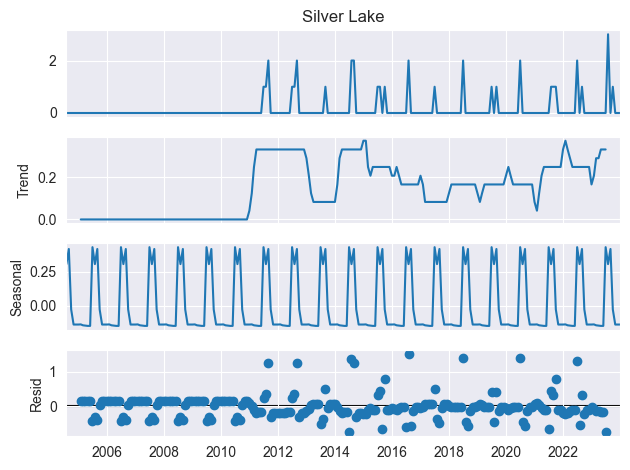

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

lake = 'Silver Lake'
lake_series = time_series_pivot[lake]
decomposition = seasonal_decompose(lake_series, model='additive', period=12)
decomposition.plot()
plt.show()

In [40]:
time_series_pivot.index

DatetimeIndex(['2004-07-31', '2004-08-31', '2004-09-30', '2004-10-31',
               '2004-11-30', '2004-12-31', '2005-01-31', '2005-02-28',
               '2005-03-31', '2005-04-30',
               ...
               '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30',
               '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31',
               '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', name='YearMonth', length=234, freq='M')

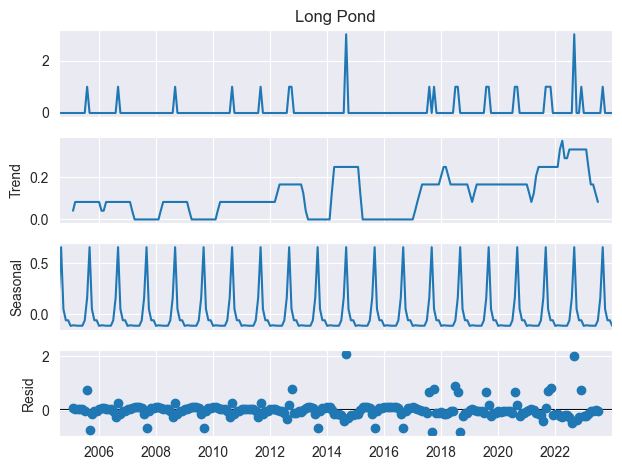

In [41]:
lake = 'Long Pond'
lake_series = time_series_pivot[lake]
decomposition = seasonal_decompose(lake_series, model='additive', period=12)
decomposition.plot()
plt.show()

In [42]:
time_series_pivot = time_series_pivot.interpolate(method='time')
time_series_pivot = time_series_pivot.fillna(method='ffill')
time_series_pivot = time_series_pivot.fillna(method='bfill')

C:\Users\curti\AppData\Local\Temp\ipykernel_58748\4121362352.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series_pivot = time_series_pivot.fillna(method='ffill')
C:\Users\curti\AppData\Local\Temp\ipykernel_58748\4121362352.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series_pivot = time_series_pivot.fillna(method='bfill')


In [43]:
time_series_pivot

lake,Country Pond,Elm Brook,"Kanasatka, Lake",Long Pond,Northwood Lake,Province Lake,Robinson Pond,Showell Pond,Silver Lake,"Winnipesaukee, Lake"
YearMonth,,,,,,,,,,
2004-07-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-08-31,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2004-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-10-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2023-08-31,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,3.0
2023-09-30,1.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0
2023-10-31,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [44]:
print(time_series_pivot.isnull().sum())

lake
Country Pond           0
Elm Brook              0
Kanasatka, Lake        0
Long Pond              0
Northwood Lake         0
Province Lake          0
Robinson Pond          0
Showell Pond           0
Silver Lake            0
Winnipesaukee, Lake    0
dtype: int64


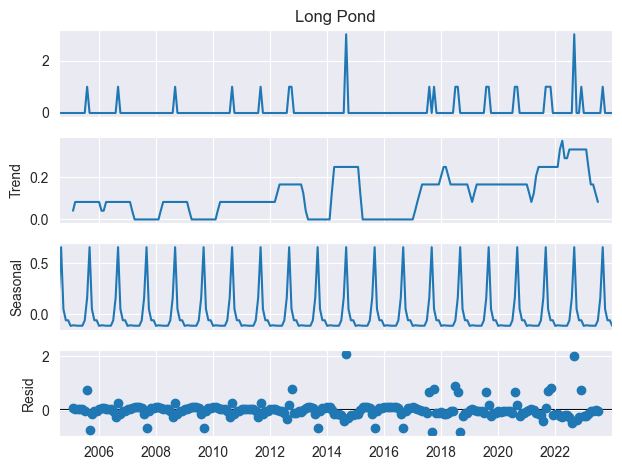

In [45]:
lake_series = time_series_pivot[lake]

decomposition = seasonal_decompose(lake_series, model='additive', period=12)
decomposition.plot()
plt.show()

In [46]:
bloom_df['date_advisory_issued'] = pd.to_datetime(bloom_df['date_advisory_issued'])
bloom_df['YearMonth'] = bloom_df['date_advisory_issued'].dt.to_period('M')

lake_time_series = (
    bloom_df.groupby(['lake', 'YearMonth'])
    .size().reset_index(name='Notification_Count')
)

In [47]:
time_series_pivot = lake_time_series.pivot(index='YearMonth', columns='lake', values='Notification_Count')
time_series_pivot = time_series_pivot.fillna(0)

In [48]:
decomposition_results = {}

for lake in time_series_pivot.columns:
    lake_series = time_series_pivot[lake].asfreq('M')  # Ensure regular frequency
    decomposition = seasonal_decompose(lake_series, model='additive', period=12)
    decomposition_results[lake] = decomposition

In [49]:
trends = pd.DataFrame({lake: decomposition_results[lake].trend for lake in decomposition_results})
seasonals = pd.DataFrame({lake: decomposition_results[lake].seasonal for lake in decomposition_results})
residuals = pd.DataFrame({lake: decomposition_results[lake].resid for lake in decomposition_results})

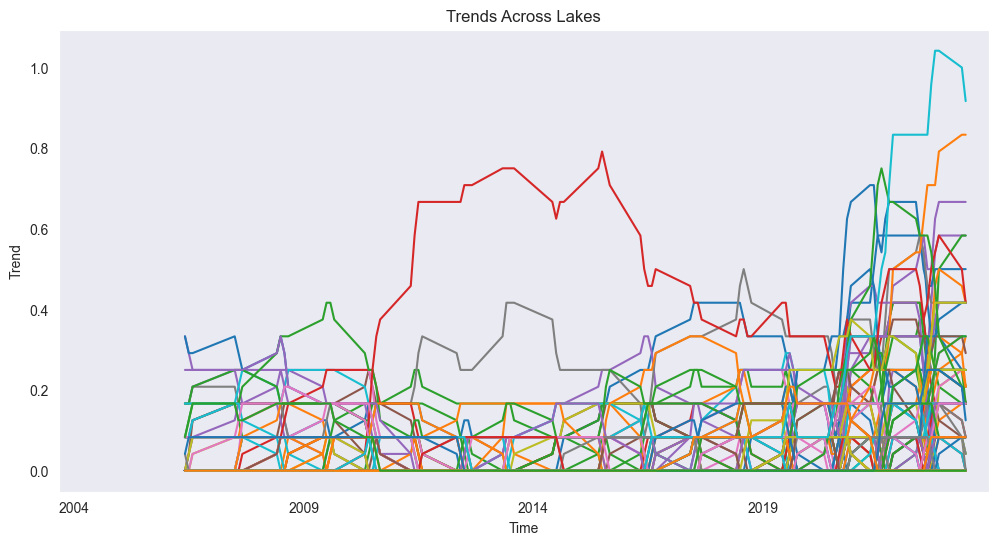

In [50]:
trends.plot(figsize=(12,6), title='Trends Across Lakes', legend=False)
plt.xlabel("Time")
plt.ylabel("Trend")
plt.grid()
plt.show()

In [51]:
trend_summary = trends.describe()
print(trend_summary)


       Adder Pond/Hopkins Pond  Angle Pond  Arlington Mill Reservoir  \
count                83.000000   83.000000                 83.000000   
mean                  0.021586    0.042169                  0.073293   
std                   0.035856    0.061214                  0.117417   
min                   0.000000    0.000000                  0.000000   
25%                   0.000000    0.000000                  0.000000   
50%                   0.000000    0.000000                  0.000000   
75%                   0.041667    0.083333                  0.083333   
max                   0.083333    0.208333                  0.375000   

       Ayers Pond  Baboosic Lake  Baxter Lake  Bearcamp Pond  Beaver Lake  \
count   83.000000      83.000000    83.000000      83.000000    83.000000   
mean     0.058735       0.088855     0.009538       0.012048     0.024096   
std      0.121746       0.146921     0.026292       0.028757     0.036880   
min      0.000000       0.000000     0.0000

In [52]:
max_increase = trends.diff().mean().sort_values(ascending=False)
print(max_increase.head())  # Lakes with fastest increasing trends

Winnipesaukee, Lake    0.011179
Province Lake          0.010163
Northwood Lake         0.008130
Crystal Lake           0.007114
Kanasatka, Lake        0.006098
dtype: float64


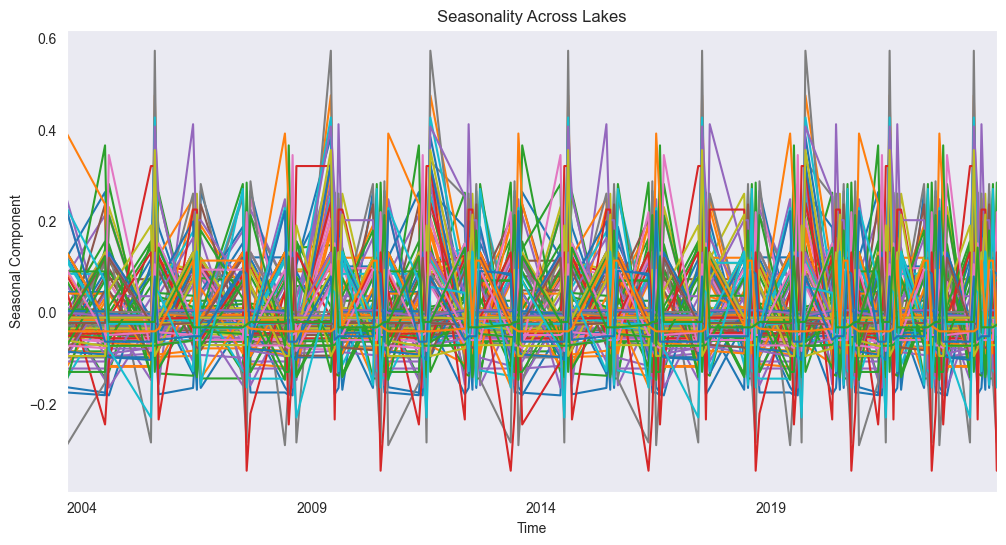

In [53]:
seasonals.plot(figsize=(12, 6), title="Seasonality Across Lakes", legend=False)
plt.xlabel("Time")
plt.ylabel("Seasonal Component")
plt.grid()
plt.show()


In [111]:
average_seasonality

YearMonth
2003-09   -0.008484
2004-07   -0.005800
2004-08   -0.003038
2005-07   -0.023696
2005-08    0.050378
             ...   
2023-08    0.013341
2023-09   -0.002843
2023-10    0.002098
2023-11    0.003576
2023-12   -0.011830
Freq: M, Length: 95, dtype: float64

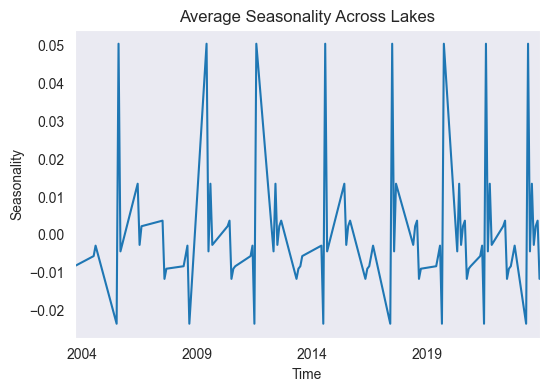

In [125]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(6,4))
average_seasonality = seasonals.mean(axis=1)
average_seasonality.plot(ax=ax, title="Average Seasonality Across Lakes")
plt.xlabel("Time")
plt.ylabel("Seasonality")
plt.grid()
plt.show()


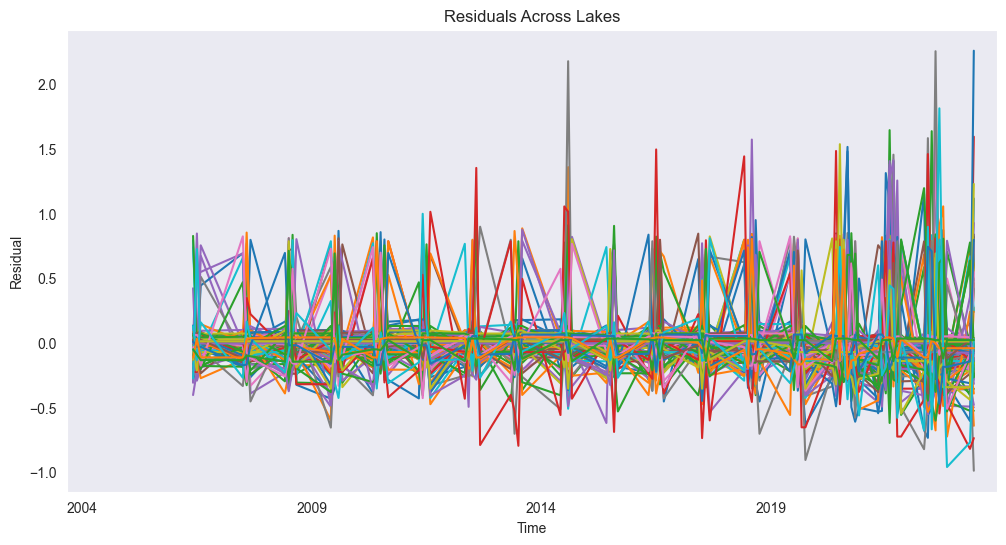

In [55]:
residuals.plot(figsize=(12, 6), title="Residuals Across Lakes", legend=False)
plt.xlabel("Time")
plt.ylabel("Residual")
plt.grid()
plt.show()


In [56]:
anomaly_threshold = residuals.std() * 2
anomalies = residuals[abs(residuals) > anomaly_threshold]
print(anomalies.dropna(how='all'))


           Adder Pond/Hopkins Pond  Angle Pond  Arlington Mill Reservoir  \
YearMonth                                                                  
2006-06                        NaN         NaN                       NaN   
2006-07                        NaN         NaN                       NaN   
2006-08                        NaN         NaN                       NaN   
2007-07                        NaN         NaN                       NaN   
2007-08                        NaN         NaN                       NaN   
...                            ...         ...                       ...   
2022-09                        NaN    0.743717                       NaN   
2022-10                   0.799934         NaN                       NaN   
2022-11                        NaN         NaN                       NaN   
2023-05                        NaN    0.743717                  0.775959   
2023-06                        NaN         NaN                       NaN   

           

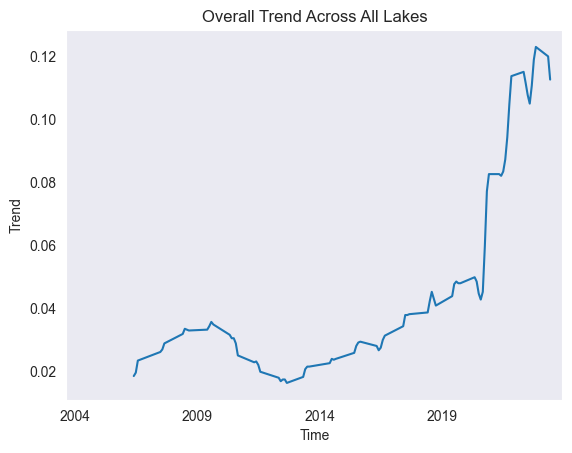

In [57]:
overall_trend = trends.mean(axis=1)
overall_trend.plot(title="Overall Trend Across All Lakes")
plt.xlabel("Time")
plt.ylabel("Trend")
plt.grid()
plt.show()


In [58]:
bloom_df

,identifier,lake,town,dominant_taxa,total_cell_concentration,date_advisory_issued,date_advisory_removed,advisory_days,auid,notification_type,year,YearMonth
0,Webster.Franklin,Webster Lake,Franklin,unidentified,">70,000 or >50%",2003-09-11,2003-09-26,15.0,NHLAK700010804-02-01,Warning,2003,2003-09
1,Baboosic.Amherst,Baboosic Lake,Amherst,Anabaena,">70,000 or >50%",2004-07-08,2004-09-06,60.0,NHLAK700060905-01-01,Warning,2004,2004-07
2,Greenwood.Kingston,Greenwood Pond,Kingston,Oscillatoria,">70,000 or >50%",2004-07-08,2004-07-23,15.0,NHLAK700061403-07,Warning,2004,2004-07
3,Country.Kingston,Country Pond,"Kingston, Newton",Microcystis,">70,000 or >50%",2004-07-29,2004-08-06,8.0,NHLAK700061403-03-01,Warning,2004,2004-07
4,Robinson.Hudson,Robinson Pond,Hudson,unidentified,">70,000 or >50%",2004-08-18,2004-09-03,16.0,NHLAK700061203-06-01,Warning,2004,2004-08
...,...,...,...,...,...,...,...,...,...,...,...,...
691,Bow.Strafford,Bow Lake,Strafford,Photo,NaN,2023-10-26,2023-11-02,7.0,NHLAK600030604-01-01,Alert,2023,2023-10
692,Warren.Alstead,"Warren, Lake",Alstead,Photo,NaN,2023-10-26,2023-11-02,7.0,NHLAK801070203-01,Alert,2023,2023-10
693,Winni.CenterHarbor,"Winnipesaukee, Lake","Center Harbor, Meredith, Moultonborough",Photo (Blackey Cove),NaN,2023-10-30,2023-12-14,45.0,NHLAK700020110-02-19-6,Alert,2023,2023-10
694,Bow.Strafford,Bow Lake,Strafford,Photo,NaN,2023-11-15,2023-11-22,7.0,NHLAK600030604-01-01,Alert,2023,2023-11


In [59]:
lakes = bloom_df['lake'].unique()

In [60]:
lakes

array(['Webster Lake ', 'Baboosic Lake', 'Greenwood Pond', 'Country Pond',
       'Robinson Pond', 'Long Pond', 'York Pond', 'Turtle Pond',
       'Monomonac, Lake', 'Pool Pond', 'Showell Pond', 'French Pond',
       'Sondogardy Pond', 'Hunkins Pond', 'Phillips Pond', 'Willand Pond',
       'Granite Lake', 'Keyser Pond', 'Horace Lake', 'Forest Lake',
       'Elm Brook', 'Winnisquam, Lake', 'Opechee Lake',
       'Little Sunapee Lake', 'Storrs Pond', 'Halfmoon Pond',
       'Mirror Lake', 'Webster Lake', 'Goose Pond', 'Harvey Lake',
       'Mascoma Lake', 'Locke Lake', 'Hermit Lake', 'Pearly Lake',
       'Rust Pond', 'Cobbetts Pond', 'Great Pond', 'Downing Pond',
       'Waukewan, Lake ', 'Angle Pond', 'Rock Pond', 'Nippo Pond',
       'White Lake ', 'Sebbins Pond', 'Duncan Lake ', 'Pawtuckaway Lake',
       'Big Island Pond', 'Province Lake', 'Canaan Street Lake',
       'Surry Mountain Reservoir', 'Jenness Pond', 'Silver Lake',
       'Winnipesaukee, Lake', 'Halfmoon Lake', 'Sawyer L

In [61]:
lakes.sort()

In [62]:
bloom_df[bloom_df['lake'] == 'Mascoma Lake']

,identifier,lake,town,dominant_taxa,total_cell_concentration,date_advisory_issued,date_advisory_removed,advisory_days,auid,notification_type,year,YearMonth
57,Mascoma.Enfield,Mascoma Lake,Enfield/Lebanon,Anabaena,">70,000 or >50%",2009-06-10,2009-06-17,7.0,NHLAK801060105-04-01,Warning,2009,2009-06
68,Mascoma.Enfield,Mascoma Lake,Enfield/Lebanon,Anabaena,"1,259,600",2009-08-12,2009-08-15,3.0,NHLAK801060105-04-01,Warning,2009,2009-08
136,Mascoma.Enfield,Mascoma Lake,Enfield/Lebanon,Microcystis,"1,300,000",2013-08-30,2013-09-03,4.0,NHLAK801060105-04-01,Warning,2013,2013-08
284,Mascoma.Enfield,Mascoma Lake,Enfield/Lebanon,NaN,NaN,2020-06-09,NaT,NaN,NHLAK801060105-04-01,Alert,2020,2020-06
401,Mascoma.Enfield,Mascoma Lake,Enfield/Lebanon,NaN,NaN,2021-08-25,NaT,NaN,NHLAK801060105-04-01,Alert,2021,2021-08
467,Mascoma.Enfield,Mascoma Lake,Enfield/Lebanon,Dolichospermum,"1,279,400",2022-06-03,2022-06-10,7.0,NHLAK801060105-04-01,Warning,2022,2022-06
577,Mascoma.Enfield,Mascoma Lake,Enfield/Lebanon,Photo,NaN,2023-06-09,2023-06-16,7.0,NHLAK801060105-04-01,Alert,2023,2023-06
611,Mascoma.Enfield,Mascoma Lake,Enfield/Lebanon,Dolichospermum,"100,800",2023-07-14,2023-07-21,7.0,NHLAK801060105-04-01,Warning,2023,2023-07
626,Mascoma.Enfield,Mascoma Lake,Enfield/Lebanon,Photo,NaN,2023-08-03,2023-08-10,7.0,NHLAK801060105-04-01,Alert,2023,2023-08
628,Mascoma.Enfield,Mascoma Lake,Enfield/Lebanon,"Woronichinia, Dolichospermum, Microcystis","641,600",2023-08-04,2023-08-11,7.0,NHLAK801060105-04-01,Warning,2023,2023-08


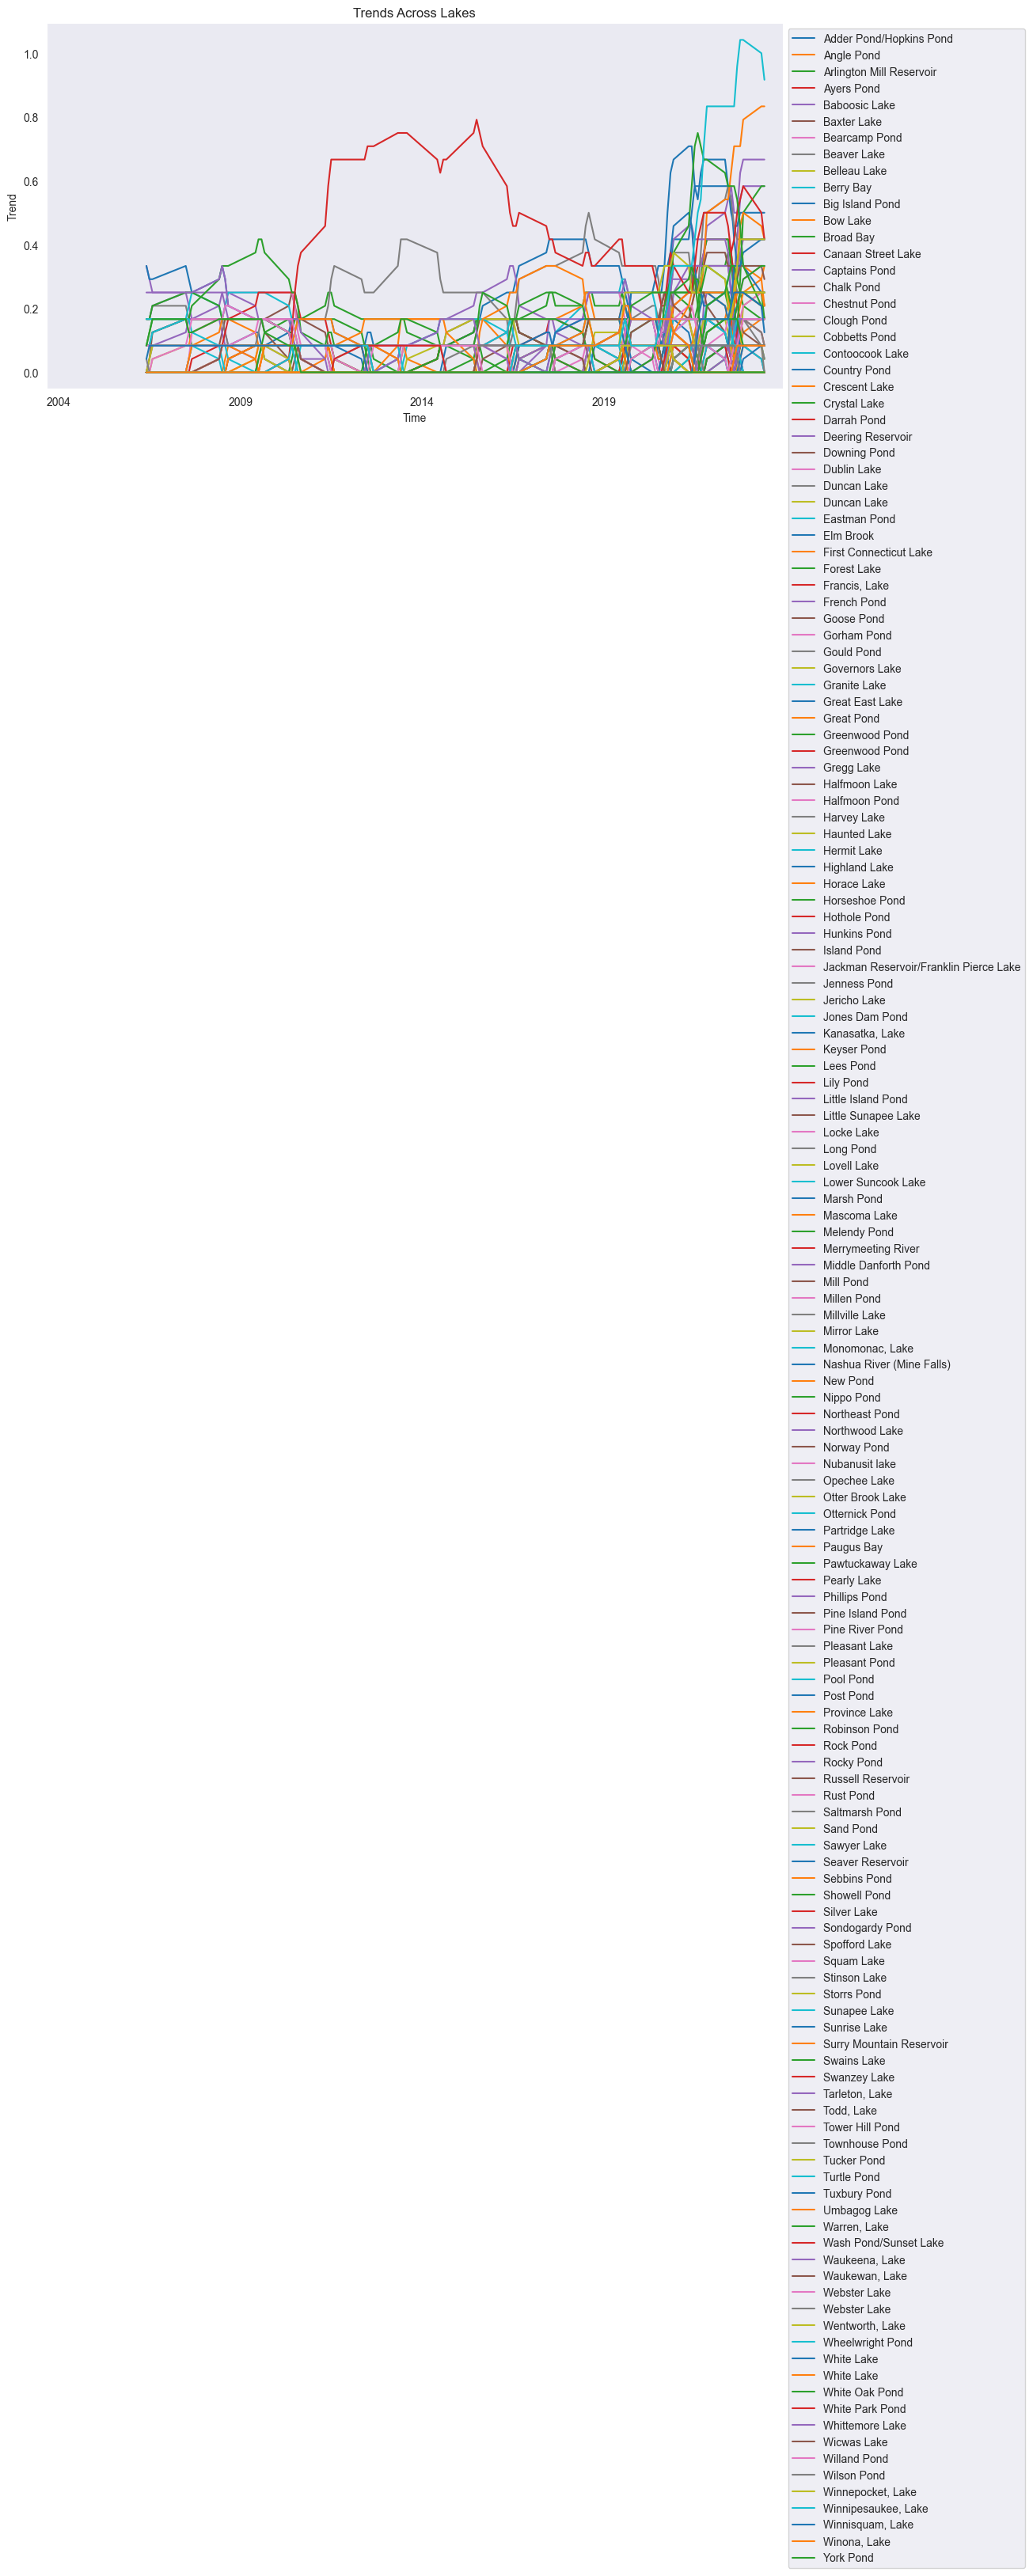

Winnipesaukee, Lake    0.011179
Province Lake          0.010163
Northwood Lake         0.008130
Crystal Lake           0.007114
Kanasatka, Lake        0.006098
dtype: float64


In [63]:
trends = pd.DataFrame({lake: decomposition_results[lake].trend for lake in decomposition_results})

# Plot trends for all lakes
trends.plot(figsize=(12, 6), title="Trends Across Lakes")
plt.xlabel("Time")
plt.ylabel("Trend")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

# Identify lakes with the fastest-increasing trends
trend_changes = trends.diff().mean().sort_values(ascending=False)
print(trend_changes.head())  # Top 5 lakes with increasing trends

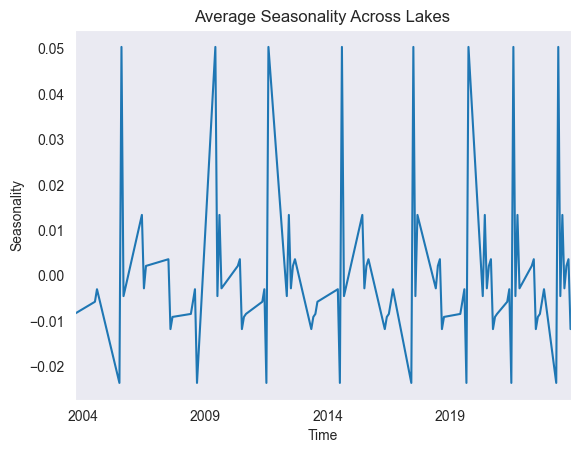

In [64]:
seasonals = pd.DataFrame({lake: decomposition_results[lake].seasonal for lake in decomposition_results})

# Plot average seasonality
average_seasonality = seasonals.mean(axis=1)
average_seasonality.plot(title="Average Seasonality Across Lakes")
plt.xlabel("Time")
plt.ylabel("Seasonality")
plt.grid()
plt.show()


C:\Users\curti\AppData\Local\Temp\ipykernel_58748\4197169645.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


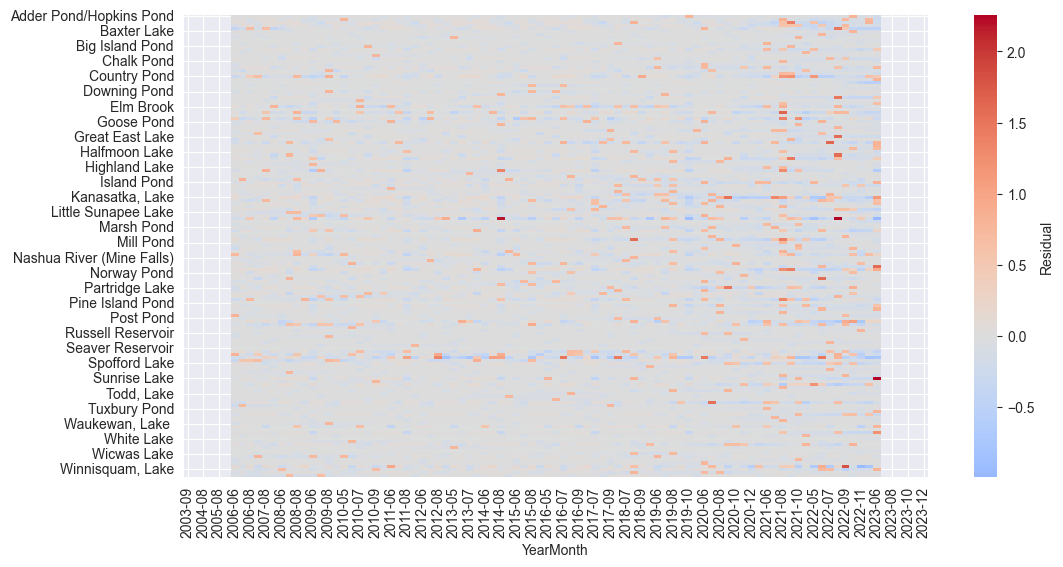

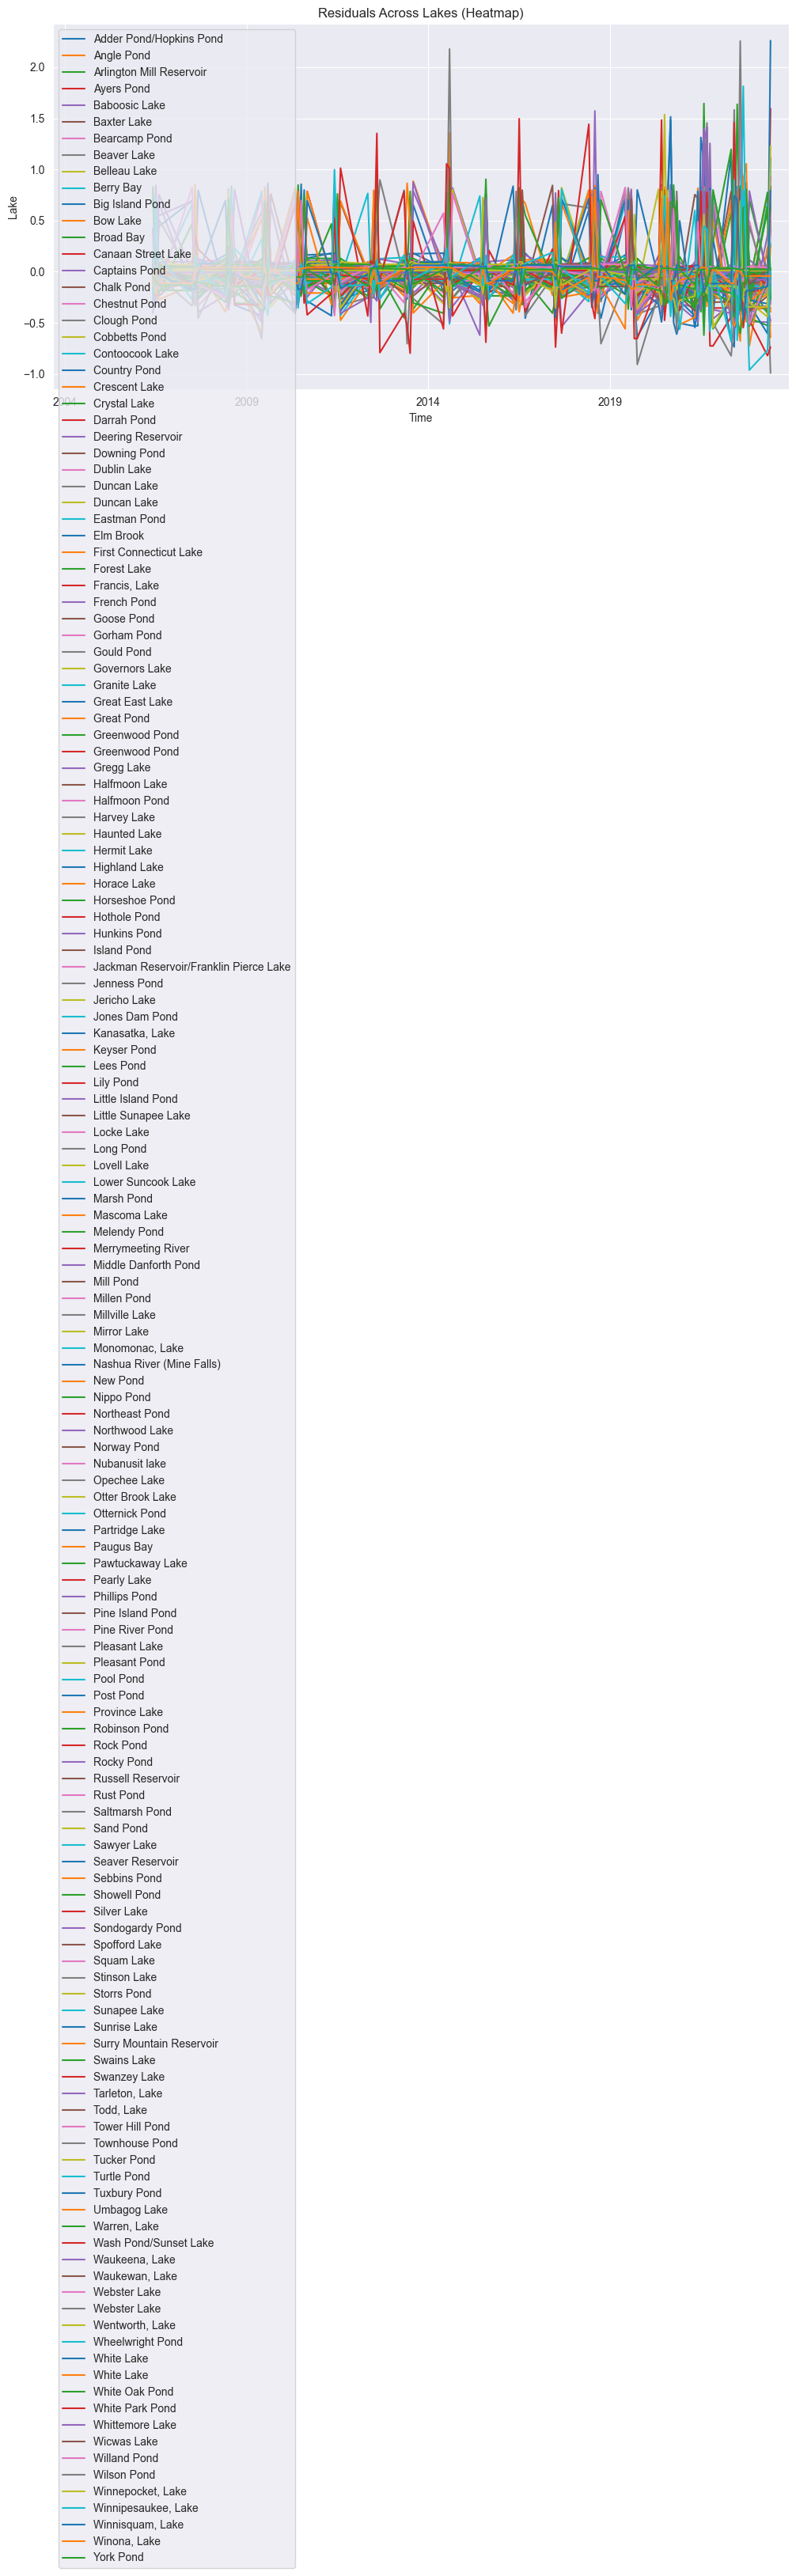

           Adder Pond/Hopkins Pond  Angle Pond  Arlington Mill Reservoir  \
YearMonth                                                                  
2006-06                        NaN         NaN                       NaN   
2006-07                        NaN         NaN                       NaN   
2006-08                        NaN         NaN                       NaN   
2007-07                        NaN         NaN                       NaN   
2007-08                        NaN         NaN                       NaN   
...                            ...         ...                       ...   
2022-09                        NaN    0.743717                       NaN   
2022-10                   0.799934         NaN                       NaN   
2022-11                        NaN         NaN                       NaN   
2023-05                        NaN    0.743717                  0.775959   
2023-06                        NaN         NaN                       NaN   

           

In [115]:
residuals = pd.DataFrame({lake: decomposition_results[lake].resid for lake in decomposition_results})

# Plot residuals for all lakes
plt.figure(figsize=(12, 6))
sns.heatmap(residuals.T, cmap='coolwarm', center=0, cbar_kws={'label': 'Residual'})
plt.title('Residuals Across Lakes (Heatmap)')
plt.xlabel("Time")
plt.ylabel("Lake")
plt.tight_layout()
plt.show()

# Highlight outliers
anomaly_threshold = residuals.std() * 2
anomalies = residuals[abs(residuals) > anomaly_threshold]
print(anomalies.dropna(how='all'))


ValueError: operands could not be broadcast together with shapes (95,) (190,) 

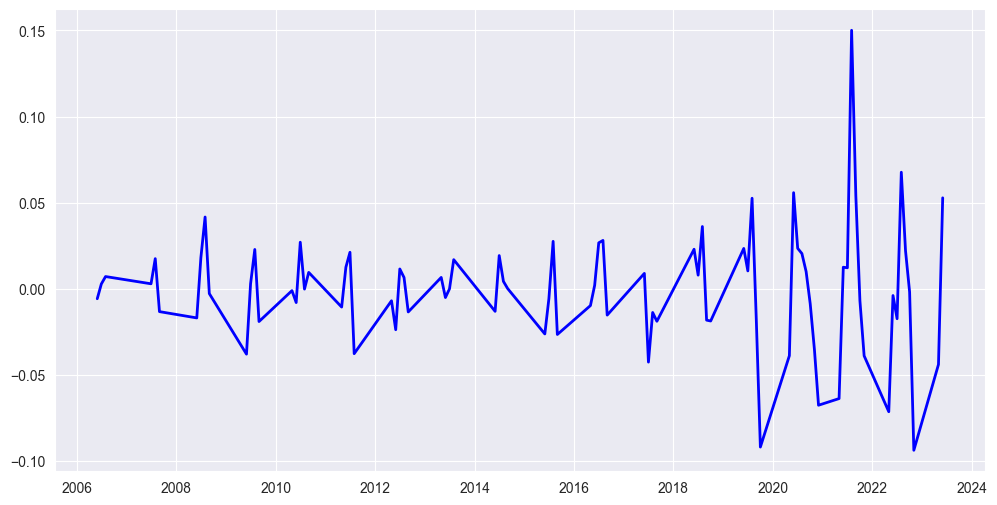

In [118]:
mean_residuals = residuals.mean(axis=1)
mean_residuals.index = mean_residuals.index.to_timestamp()

# Plot the aggregated residuals
plt.figure(figsize=(12, 6))
plt.plot(mean_residuals, label="Mean Residuals", color='blue', linewidth=2)
plt.fill_between(mean_residuals.index,
                 mean_residuals - residuals.std(axis=1), 
                 mean_residuals + residuals.std(axis=1), 
                 color='blue', alpha=0.2, label="±1 Std Dev")
plt.title("Mean Residuals Across Lakes")
plt.xlabel("Time")
plt.ylabel("Residual")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

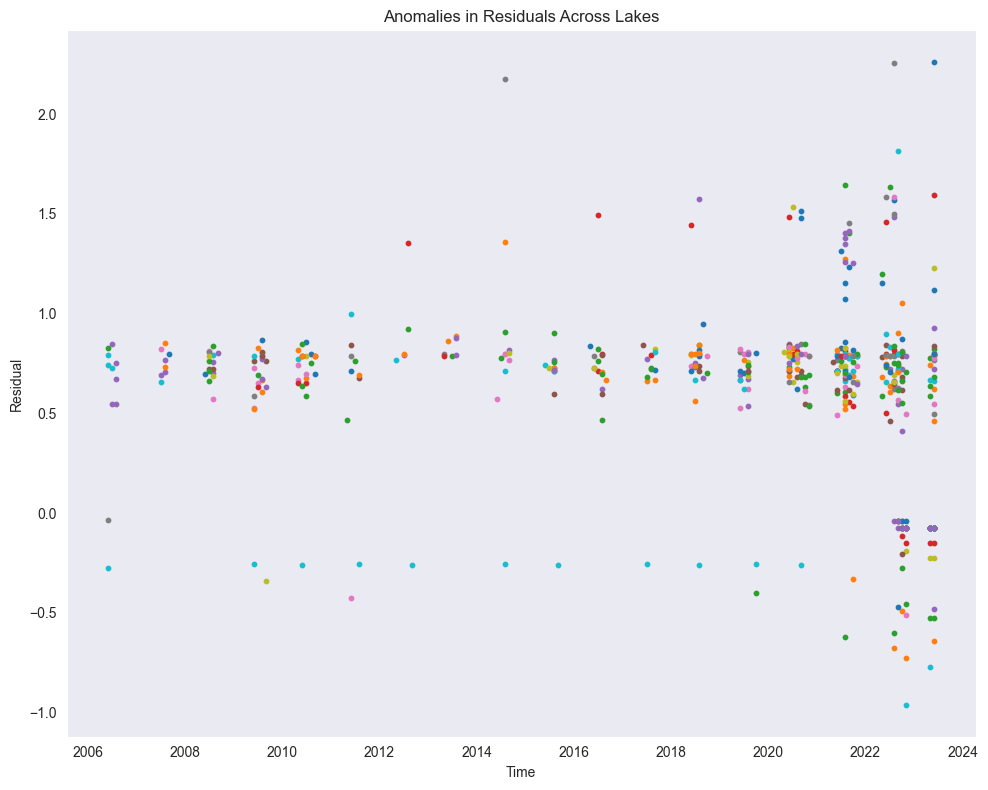

In [123]:
# Plot anomalies
plt.figure(figsize=(10, 8))
#anomalies.index = anomalies.index.to_timestamp()
for lake in anomalies.columns:
    lake_anomalies = anomalies[lake].dropna()
    plt.scatter(lake_anomalies.index, lake_anomalies, label=lake, s=10)  # Small markers for anomalies
plt.title("Anomalies in Residuals Across Lakes")
plt.xlabel("Time")
plt.ylabel("Residual")
plt.grid()
plt.tight_layout()
plt.show()


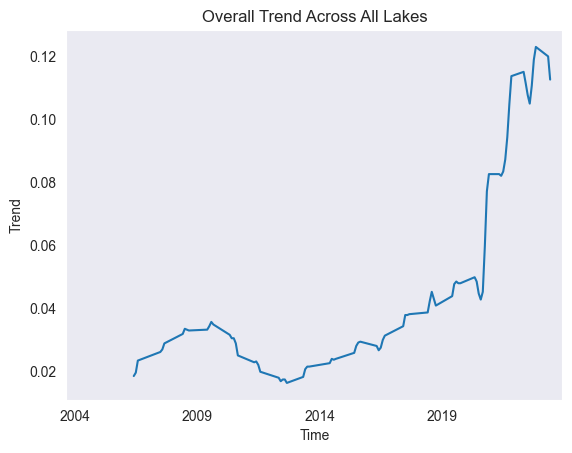

In [66]:
# Calculate overall trend across all lakes
overall_trend = trends.mean(axis=1)
overall_trend.plot(title="Overall Trend Across All Lakes")
plt.xlabel("Time")
plt.ylabel("Trend")
plt.grid()
plt.show()


In [67]:
# Split into two periods
period1 = advisory_counts_by_year.loc[2003:2017]
period2 = advisory_counts_by_year.loc[2018:2023]

from scipy.stats import ttest_ind, mannwhitneyu, shapiro

# Test for normality
_, p1 = shapiro(period1)
_, p2 = shapiro(period2)

# Choose and apply the test
if p1 > 0.05 and p2 > 0.05:  # Both periods are normally distributed
    test_stat, p_value = ttest_ind(period1, period2)
    test_type = "T-Test"
else:  # At least one period is not normally distributed
    test_stat, p_value = mannwhitneyu(period1, period2)
    test_type = "Mann-Whitney U Test"

# Display results
print(f"{test_type}: Statistic = {test_stat}, p-value = {p_value}")
if p_value < 0.05:
    print("Statistically significant difference detected.")
else:
    print("No statistically significant difference detected.")

T-Test: Statistic = -5.87676460000851, p-value = 1.1675093802580082e-05
Statistically significant difference detected.


In [68]:
advisory_counts_by_year = advisory_counts_by_year.to_frame()

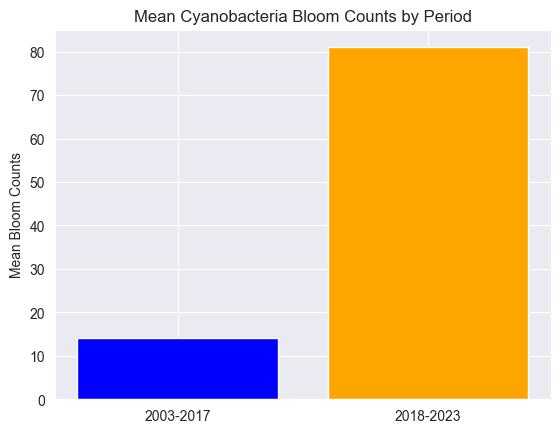

In [71]:
import matplotlib.pyplot as plt

# Calculate mean counts for each period
mean_period1 = period1.mean()
mean_period2 = period2.mean()

# Bar plot
plt.bar(['2003-2017', '2018-2023'], [mean_period1, mean_period2], color=['blue', 'orange'])
plt.title('Mean Cyanobacteria Bloom Counts by Period')
plt.ylabel('Mean Bloom Counts')
plt.show()


In [70]:
mean_period1

14.0

In [72]:
period2

year
2018     34
2019     34
2020     60
2021    121
2022    101
2023    136
dtype: int64

In [73]:
print(mean_period1.values)
print(mean_period2.values)

AttributeError: 'numpy.float64' object has no attribute 'values'

In [74]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapi")

def geocode(name):
    location = geolocator.geocode(name + ", New Hampshire")
    if location:
        return location.latitude, location.longitude
    return None, None

bloom_df["Coordinates"] = bloom_df["lake"].apply(geocode)
bloom_df["Latitude"] = bloom_df["Coordinates"].apply(lambda x: x[0])
bloom_df["Longitude"] = bloom_df["Coordinates"].apply(lambda x: x[1])


KeyboardInterrupt: 

In [ ]:
bloom_df

In [ ]:
lakes_gdf = gpd.GeoDataFrame(
    lakes_df,
    geometry=gpd.points_from_xy(lakes_df['Longitude'], lakes_df['Latitude']),
    crs="EPSG:4326"  # Assuming WGS84 coordinates
)